In [20]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

In [11]:
from moexalgo import Market, Ticker
from datetime import date, datetime, timedelta
import time

# Загрузка данных

## Ежедневные загрузки

In [1]:
from moexalgo import Ticker
from datetime import date, datetime, timedelta
import time

def get_history(ticker, load_date):
    loader = Ticker(ticker)
    one_day_df = loader.tradestats(date=load_date, till_date=load_date)
    if one_day_df.shape[0] > 0:
        print(load_date, ticker, one_day_df.shape)
        one_day_df.to_pickle(f"../data/raw/{load_date.replace('-','')}_{ticker}.pkl")
    else:
        print(load_date, ticker, 'Данных нет')
        
yesterday = datetime.today() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

ticker='YNDX'
get_history(ticker, yesterday)

2023-12-08 YNDX (104, 23)


## История

In [3]:
from datetime import date, timedelta
import time

ticker='YNDX'

load_date = date(2023, 12, 1)
end_date = date(2023, 12, 8)

while load_date <= end_date:
    date_str = load_date.strftime("%Y-%m-%d")
    get_history(ticker, date_str)
    load_date += timedelta(days=1)
    time.sleep(3)

2023-12-01 YNDX (104, 23)
2023-12-02 YNDX Данных нет
2023-12-03 YNDX Данных нет
2023-12-04 YNDX (104, 23)
2023-12-05 YNDX (104, 23)
2023-12-06 YNDX (104, 23)
2023-12-07 YNDX (104, 23)
2023-12-08 YNDX (104, 23)


# Препроцессинг

Загружаем все данные.

In [20]:
import pandas as pd
import glob

all_files = glob.glob('../data/raw/*.pkl')

df = []
for filename in all_files:
    tdf = pd.read_pickle(filename)
    df.append(tdf)

df = pd.concat(df, axis=0, ignore_index=True)

df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,174,63,4477160.0,2065844.0,2453,1133,0.37,1825.2,1823.3,2023-10-27 00:31:40
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,95,47,2505360.0,1929068.0,1370,1056,0.13,1828.7,1826.8,2023-10-27 00:31:41
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,44,27,695113.0,304559.0,381,167,0.39,1824.4,1823.7,2023-10-27 00:31:42
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,187,77,2872988.0,1857655.0,1570,1015,0.21,1829.9,1830.2,2023-10-27 00:31:43
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,149,308,4913530.0,16156931.0,2699,8885,-0.53,1820.5,1818.5,2023-10-27 00:31:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08,18:20:00,2360.0,2361.8,2357.0,2357.0,0.0001,1585,3740399.0,...,54,50,1897691.0,1842707.0,804,781,0.01,2360.3,2359.4,2023-12-08 18:20:10
24642,YNDX,2023-12-08,18:25:00,2357.2,2358.8,2357.0,2358.8,0.0001,780,1838766.0,...,26,31,1006529.0,832237.0,427,353,0.09,2357.2,2357.6,2023-12-08 18:25:11
24643,YNDX,2023-12-08,18:30:00,2358.8,2361.2,2358.8,2361.0,0.0001,652,1539027.0,...,33,30,738774.0,800253.0,313,339,-0.04,2360.3,2360.6,2023-12-08 18:30:10
24644,YNDX,2023-12-08,18:35:00,2361.0,2361.0,2354.2,2354.4,0.0004,2910,6856599.0,...,35,78,1768991.0,5087607.0,751,2159,-0.48,2355.5,2356.5,2023-12-08 18:35:11


In [21]:
df.sample(7).T

,3156,4272,14559,13173,7539,5064,12137
ticker,YNDX,YNDX,YNDX,YNDX,YNDX,YNDX,YNDX
tradedate,2023-02-14,2023-03-02,2023-07-24,2023-07-05,2023-04-17,2023-03-14,2023-06-21
tradetime,13:05:00,10:45:00,18:40:00,15:50:00,14:20:00,16:05:00,16:10:00
pr_open,2019.8,2022.0,2618.4,2389.8,1952.4,1893.8,2532.6
pr_high,2024.4,2022.4,2622.0,2390.8,1955.2,1897.8,2534.0
pr_low,2019.6,2019.8,2618.0,2388.8,1951.6,1893.2,2529.6
pr_close,2024.2,2020.8,2621.6,2388.8,1952.8,1893.2,2530.2
pr_std,0.0001,0.0001,0.0002,0.0001,0.0001,0.0001,0.0002
vol,19738,1783,6955,1573,1457,3387,2331
val,39881313.0,3602956.0,18224298.0,3758236.0,2846224.0,6418965.0,5901230.0


## Фичи

In [22]:
df['pr_mean'] = df[['pr_high','pr_low']].mean(axis=1)

Отношение к последнему часу

In [23]:
for i in range(1,11+1):
    df[f'ratio_pr_mean_{i}'] = df['pr_mean'] / df['pr_mean'].shift(i)
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,ratio_pr_mean_2,ratio_pr_mean_3,ratio_pr_mean_4,ratio_pr_mean_5,ratio_pr_mean_6,ratio_pr_mean_7,ratio_pr_mean_8,ratio_pr_mean_9,ratio_pr_mean_10,ratio_pr_mean_11
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,1.000658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,1.001807,1.003345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,0.997479,0.996605,0.998135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08,18:20:00,2360.0,2361.8,2357.0,2357.0,0.0001,1585,3740399.0,...,0.999788,1.000085,0.999365,1.000763,1.002081,1.000976,0.998561,0.999026,0.998603,0.998096
24642,YNDX,2023-12-08,18:25:00,2357.2,2358.8,2357.0,2358.8,0.0001,780,1838766.0,...,0.998856,0.999153,0.999449,0.998729,1.000127,1.001444,1.000339,0.997926,0.998391,0.997968
24643,YNDX,2023-12-08,18:30:00,2358.8,2361.2,2358.8,2361.0,0.0001,652,1539027.0,...,1.000254,0.999746,1.000042,1.000339,0.999619,1.001018,1.002336,1.001230,0.998815,0.999280
24644,YNDX,2023-12-08,18:35:00,2361.0,2361.0,2354.2,2354.4,0.0004,2910,6856599.0,...,0.999873,0.999237,0.998729,0.999025,0.999322,0.998602,1.000000,1.001317,1.000212,0.997799


Прошлый час

In [24]:
for a in ['min','max','mean','std']:
    df[f'hour_{a}'] = df.groupby('tradedate')['pr_mean'].transform(
        lambda s: s.shift(1).rolling(11).agg(a))
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,ratio_pr_mean_6,ratio_pr_mean_7,ratio_pr_mean_8,ratio_pr_mean_9,ratio_pr_mean_10,ratio_pr_mean_11,hour_min,hour_max,hour_mean,hour_std
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08,18:20:00,2360.0,2361.8,2357.0,2357.0,0.0001,1585,3740399.0,...,1.002081,1.000976,0.998561,0.999026,0.998603,0.998096,2354.5,2363.9,2360.081818,2.817736
24642,YNDX,2023-12-08,18:25:00,2357.2,2358.8,2357.0,2358.8,0.0001,780,1838766.0,...,1.000127,1.001444,1.000339,0.997926,0.998391,0.997968,2354.5,2362.8,2359.672727,2.518766
24643,YNDX,2023-12-08,18:30:00,2358.8,2361.2,2358.8,2361.0,0.0001,652,1539027.0,...,0.999619,1.001018,1.002336,1.001230,0.998815,0.999280,2354.5,2362.8,2359.236364,2.352136
24644,YNDX,2023-12-08,18:35:00,2361.0,2361.0,2354.2,2354.4,0.0004,2910,6856599.0,...,0.999322,0.998602,1.000000,1.001317,1.000212,0.997799,2354.5,2362.8,2359.081818,2.226575


Прошлый день

In [25]:
agg_temp = df.groupby('tradedate')['pr_mean'].agg(['min','max','mean','std'])
agg_temp.columns = [f'ytd_{col}' for col in agg_temp.columns]
agg_temp = agg_temp.reset_index()
agg_temp['tradedate'] = agg_temp['tradedate'] + timedelta(days=1)

df = df.merge(agg_temp, on='tradedate', how='left')
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,ratio_pr_mean_10,ratio_pr_mean_11,hour_min,hour_max,hour_mean,hour_std,ytd_min,ytd_max,ytd_mean,ytd_std
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08,18:20:00,2360.0,2361.8,2357.0,2357.0,0.0001,1585,3740399.0,...,0.998603,0.998096,2354.5,2363.9,2360.081818,2.817736,2308.3,2364.1,2344.300962,9.129016
24642,YNDX,2023-12-08,18:25:00,2357.2,2358.8,2357.0,2358.8,0.0001,780,1838766.0,...,0.998391,0.997968,2354.5,2362.8,2359.672727,2.518766,2308.3,2364.1,2344.300962,9.129016
24643,YNDX,2023-12-08,18:30:00,2358.8,2361.2,2358.8,2361.0,0.0001,652,1539027.0,...,0.998815,0.999280,2354.5,2362.8,2359.236364,2.352136,2308.3,2364.1,2344.300962,9.129016
24644,YNDX,2023-12-08,18:35:00,2361.0,2361.0,2354.2,2354.4,0.0004,2910,6856599.0,...,1.000212,0.997799,2354.5,2362.8,2359.081818,2.226575,2308.3,2364.1,2344.300962,9.129016


Прошлый месяц

In [26]:
month_temp = df['pr_mean'].rolling(3120).agg(['min','max','mean','std'])
month_temp.columns = [f'month_{col}' for col in month_temp.columns]
month_temp['tradedate'] = df['tradedate']
month_temp['tradetime'] = df['tradetime']
month_temp['tradedate'] = month_temp['tradedate'].shift(-1)

month_temp = month_temp.groupby('tradedate').nth(0)
month_temp = month_temp.iloc[:,:-1]

df = df.merge(month_temp, on='tradedate', how='left')
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,hour_mean,hour_std,ytd_min,ytd_max,ytd_mean,ytd_std,month_min,month_max,month_mean,month_std
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08,18:20:00,2360.0,2361.8,2357.0,2357.0,0.0001,1585,3740399.0,...,2360.081818,2.817736,2308.3,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832
24642,YNDX,2023-12-08,18:25:00,2357.2,2358.8,2357.0,2358.8,0.0001,780,1838766.0,...,2359.672727,2.518766,2308.3,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832
24643,YNDX,2023-12-08,18:30:00,2358.8,2361.2,2358.8,2361.0,0.0001,652,1539027.0,...,2359.236364,2.352136,2308.3,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832
24644,YNDX,2023-12-08,18:35:00,2361.0,2361.0,2354.2,2354.4,0.0004,2910,6856599.0,...,2359.081818,2.226575,2308.3,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832


## Таргет

In [27]:
from scipy.signal import find_peaks

# Дистанция между пикам/впадинами
dist = 5

# Считаем пики
peaks, _ = find_peaks(df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['peak'] = 1
df = df.join(temp)
df['peak'] = df['peak'].fillna(0).astype(int)

# Считаем впадины
peaks, _ = find_peaks(0 - df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['trough'] = 2
df = df.join(temp)
df['trough'] = df['trough'].fillna(0).astype(int)

# Формируем таргет
df['target'] = df[['trough','peak']].max(axis=1)

df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,ytd_max,ytd_mean,ytd_std,month_min,month_max,month_mean,month_std,peak,trough,target
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08,18:20:00,2360.0,2361.8,2357.0,2357.0,0.0001,1585,3740399.0,...,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832,0,0,0
24642,YNDX,2023-12-08,18:25:00,2357.2,2358.8,2357.0,2358.8,0.0001,780,1838766.0,...,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832,0,2,2
24643,YNDX,2023-12-08,18:30:00,2358.8,2361.2,2358.8,2361.0,0.0001,652,1539027.0,...,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832,0,0,0
24644,YNDX,2023-12-08,18:35:00,2361.0,2361.0,2354.2,2354.4,0.0004,2910,6856599.0,...,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832,0,0,0


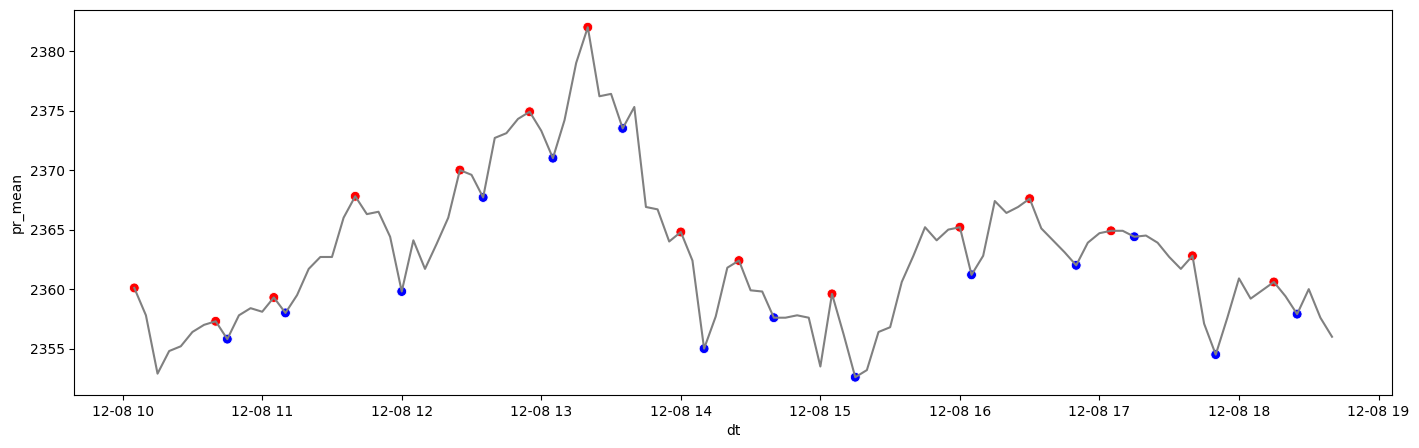

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

temp = df[['tradedate','tradetime','target','pr_mean']][-104:]
temp['dt'] = df['tradedate'].astype(str) + ' ' + df['tradetime'].astype(str)
temp['dt'] = pd.to_datetime(temp['dt'])

plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('target > 0')['target'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('target > 0')['dt'], y=temp.query('target > 0')['pr_mean'], c=colors, s=50);

## Сохранение

Удалим пустые значения.

In [29]:
df = df[df['tradetime'].astype(str) > '11']
df = df.dropna(subset=['month_mean','ytd_mean'])

Сохраним датасет.

In [30]:
today = datetime.today().strftime('%Y-%m-%d')
df.to_pickle(f"../data/processed/{today.replace('-','')}_{ticker}.pkl")

# Агрегаты для предсказания

Подготовим данные за последний день и последжний месяц, которы бедуем цеплять при предсказании.

In [31]:
agg_temp = df.groupby('tradedate')['pr_mean'].agg(['min','max','mean','std'])
agg_temp.columns = [f'ytd_{col}' for col in agg_temp.columns]
agg_temp = agg_temp[-1:]
agg_temp = agg_temp.reset_index(drop=True)

agg_temp

,ytd_min,ytd_max,ytd_mean,ytd_std
0,2352.6,2382.0,2363.66129,6.018288


In [34]:
month_temp = df[:3120][['pr_mean']].agg(['min','max','mean','std']).T
month_temp.columns = [f'month_{col}' for col in month_temp.columns]
month_temp = month_temp.reset_index(drop=True)

month_temp

,month_min,month_max,month_mean,month_std
0,1815.9,2039.5,1942.53,48.199487


In [35]:
ytd_month = pd.concat([agg_temp,month_temp], axis=1)
ytd_month.to_pickle(f'../data/interim/{datetime.today().strftime("%Y-%m-%d").replace("-","")}_part.pkl')

# Обучение

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import classification_report

import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

## Датасет

In [37]:
today = datetime.today().strftime('%Y-%m-%d')
df = pd.read_pickle(f"../data/processed/{today.replace('-','')}_{ticker}.pkl")
df = df.fillna(0)

drop_cols = ['ticker','tradedate','tradetime','systime','pr_mean','peak','trough','target'] 
f_cols = [col for col in df.columns if col not in drop_cols]

last_day = str(df['tradedate'].max())
train = df[df['tradedate'].astype('str') < last_day]
test = df[df['tradedate'].astype('str') == last_day]

X_train, y_train = train[f_cols], train['target']
X_test, y_test = test[f_cols], test['target']

print(X_train.shape, X_test.shape)
print(y_train.mean() * 100, y_test.mean() * 100)

(14972, 42) (93, 42)
37.88405022709057 41.935483870967744


## CV

In [39]:
params = {
    'n_estimators ': [100],
    'learning_rate ': [0.9, 0.8, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1],
    #'max_depth ': [1,2,3,4,5,6,7,8],
    'subsample ': [0.3],
    'colsample_bytree ': [0.3]
}

clf = lgb.LGBMClassifier(verbosity=-1)
model = GridSearchCV(
    clf,
    params,
    scoring='precision_macro',
    cv=TimeSeriesSplit(n_splits=5))
model.fit(X_train, y_train)

print(model.best_score_)
print(model.best_params_)

0.6085945305471154
{'colsample_bytree ': 0.3, 'learning_rate ': 0.9, 'n_estimators ': 100, 'subsample ': 0.3}


## Оценка

In [40]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # , labels=[1, 2, 3]

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        67
           1       0.38      0.23      0.29        13
           2       0.60      0.46      0.52        13

    accuracy                           0.72        93
   macro avg       0.58      0.52      0.54        93
weighted avg       0.69      0.72      0.70        93



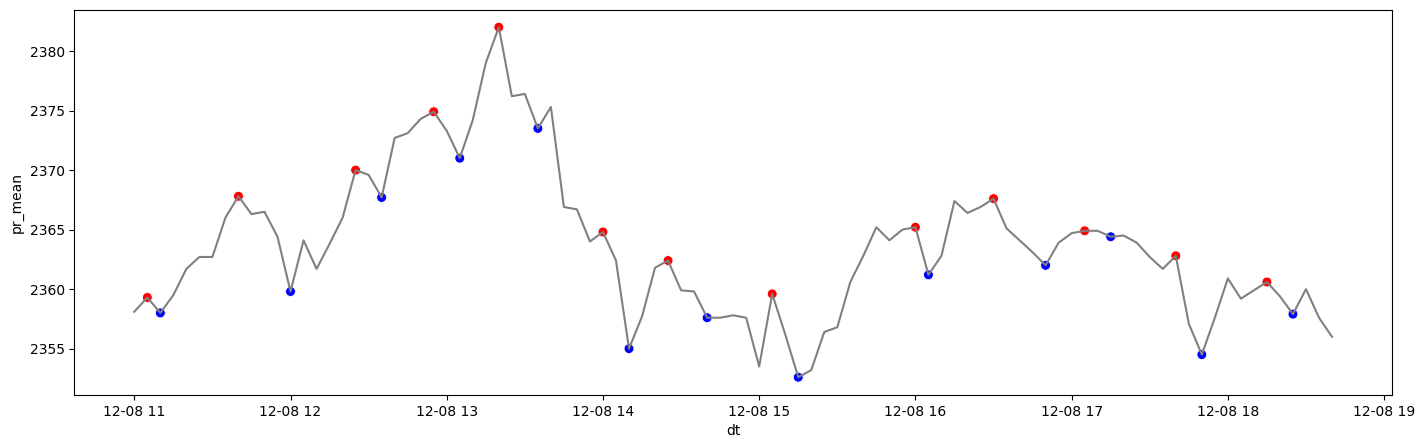

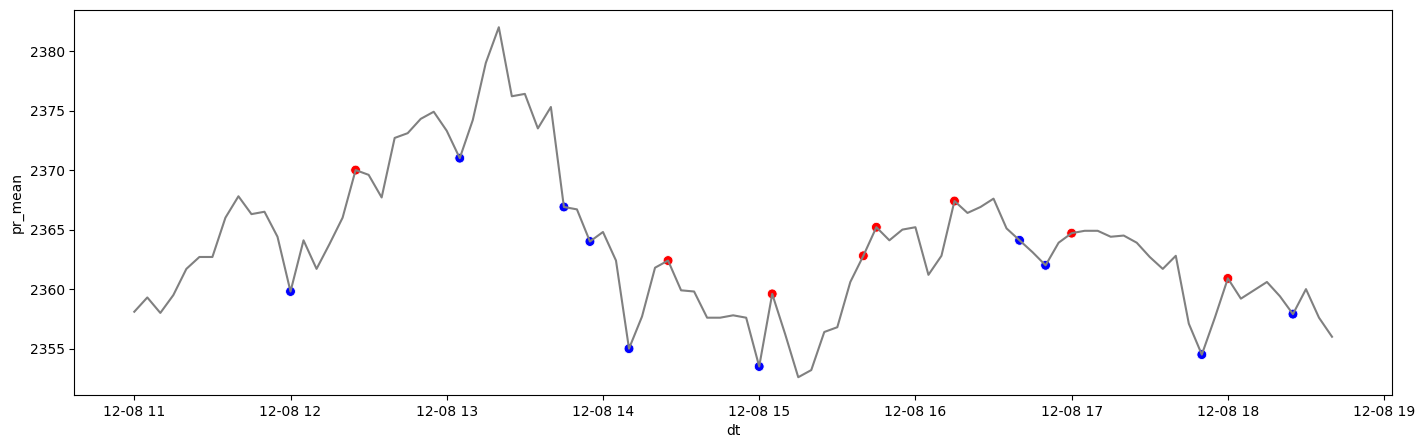

In [41]:
temp = test[['tradedate','tradetime','target','pr_mean']]
temp['pred'] = y_pred
temp['dt'] = temp[['tradedate','tradetime']].astype(str).apply(
    lambda row: row['tradedate'] + ' ' + row['tradetime'], axis=1)
temp['dt'] = pd.to_datetime(temp['dt'])


plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('target > 0')['target'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('target > 0')['dt'], y=temp.query('target > 0')['pr_mean'], c=colors, s=50);
plt.show()

plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('pred > 0')['pred'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('pred > 0')['dt'], y=temp.query('pred > 0')['pr_mean'], c=colors, s=50);
plt.show()

## Важность фичей

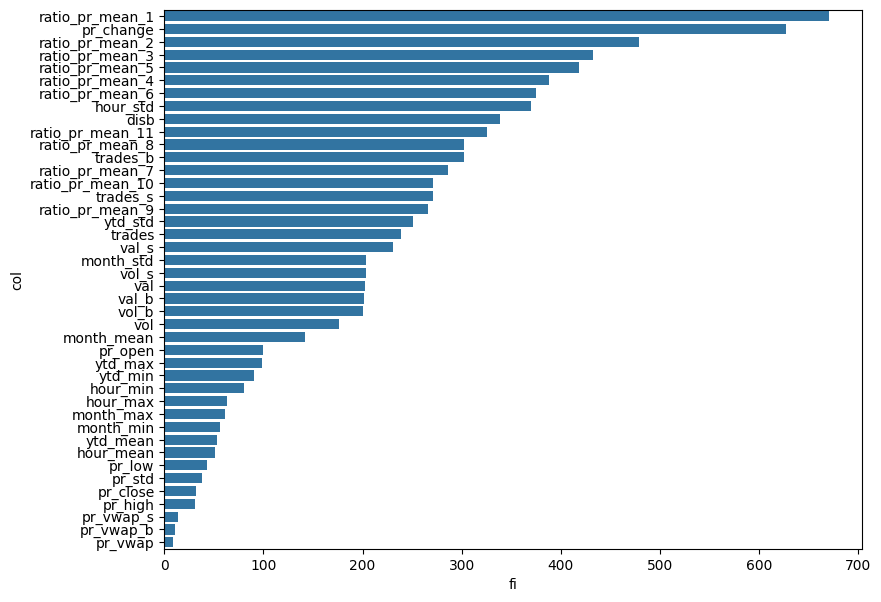

In [42]:
fi_df = pd.DataFrame({
    'col': X_train.columns,
    'fi': model.best_estimator_.feature_importances_
}).sort_values(by='fi', ascending=False)

plt.figure(figsize=(9,7))
sns.barplot(data=fi_df, y='col', x='fi', orient='h');

## Сохранение

In [45]:
today = datetime.today().strftime('%Y-%m-%d')
model.best_estimator_.booster_.save_model(f'../models/{today.replace("-","")}_model.lgb')